### install

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install JPype1
!pip install konlpy

     |████████████████████████████████| 448 kB 5.1 MB/s eta 0:00:01
     |████████████████████████████████| 19.4 MB 1.2 MB/s 


In [ ]:
import pandas as pd

# 형태소분석
from konlpy.tag import Okt

# 갯수카운트
from collections import Counter

### 엑셀에서 df가져오기

In [ ]:
##### 쇼핑에서 가져올 때 #####

file = ['네이버쇼핑_IT.xlsx','네이버쇼핑_경제.xlsx',
        '네이버쇼핑_여행.xlsx','네이버쇼핑_취미.xlsx']
dfname=['it','경제','여행','취미']

for name,i in zip(file,dfname):
    df_sh = pd.read_excel(f'/content/drive/My Drive/Colab Notebooks/{name}',
                          engine='openpyxl', header = None, names=['도서명','분류1','분류2'])
    globals()['df_sh_{}'.format(i)]=df_sh

df_sh_it

,도서명,분류1,분류2
0,한정희 된다 7일 실무 엑셀 [이지스퍼블리싱],오피스활용도서,MS Excel
1,"파이썬 머신러닝 완벽 가이드 / 위키북스 (책,도서)",프로그래밍 언어,NaN
2,윤성우의 열혈 c 프로그래밍 책 윤성우 오렌지미디어,프로그래밍 언어,NaN
3,영상 편집을 위한 프리미어 프로 제이펍,그래픽/멀티미디어,그래픽일반/자료집
4,do it 점프 투 파이썬 / 이지스퍼블리싱 책,프로그래밍 언어,NaN
...,...,...,...
495,autocad 2010 쉽게 배우기 책 (영진닷컴),그래픽/멀티미디어,그래픽툴/저작툴
496,자바스크립트 패턴과 테스트,프로그래밍 언어,NaN
497,이상만 (메카피아) 솔리드웍스 정적구조 공학해석 실무 책,그래픽/멀티미디어,그래픽툴/저작툴
498,sql server로 배우는 데이터베이스 개론과 실습 책 (한빛아카데미),OS/데이터베이스,NaN


In [ ]:
df_sh_경제

,도서명,분류1,분류2
0,민음인 부자 아빠 가난한 아빠. 1(20주년 특별 기념판)(개정증보판),재테크/투자,재테크일반
1,거인의 포트폴리오 / 페이지2북스,재테크/투자,주식/증권
2,한경무크 광장 변호사들이 알려주는 궁금한 중대재해처벌법 / 한국경제신문 / 한국경제매거진,경영,경영실무
3,"개미 5년, 세후 55억",재테크/투자,주식/증권
4,이선미 싱글맘 부동산 경매로 홀로서기,재테크/투자,부동산/경매
...,...,...,...
495,(한스미디어) 주식 투자 잘하는 사람들의 7가지 무기 책 김진,재테크/투자,주식/증권
496,곽상빈 [평단] 주린이를 위한 친절한 주식공부,재테크/투자,주식/증권
497,교통사고 피해보상 아는 만큼 더 받는다 / 크라운출판사 책,재테크/투자,재테크일반
498,[유니오니아시아] 한마디면 충분하다,마케팅/세일즈,영업/세일즈


In [ ]:
df_sh_여행

,도서명,분류1,분류2
0,식객 허영만의 백반기행 세트(1-2권) 책,테마여행,맛집여행
1,식객 허영만의 백반기행 1 2 허영만 책 도서 가디언,테마여행,맛집여행
2,[가디언] 식객 허영만의 백반기행 2,테마여행,맛집여행
3,우리는 어쩌다 런던에서 서유진,국내여행,제주도
4,[가디언] 식객 허영만의 백반기행 세트(1-2권) 식객이 뽑은 진짜 맛집 97911...,테마여행,맛집여행
...,...,...,...
495,영국 장식 미술 기행 책,해외여행,유럽여행
496,(황금비율) 아이슬란드 여행 지도 책,해외여행,유럽여행
497,"뉴노멀, 한 달 살기 동유럽 / 나우출판사 (책,도서)",해외여행,유럽여행
498,유적지에서 만나는 화랑정신,테마여행,역사/문학기행


In [ ]:
df_sh_취미

,도서명,분류1,분류2
0,소워니놀이터의 띠부띠부 직업놀이 시대인,취미/레저,취미기타
1,소워니놀이터의 띠부띠부 가게놀이 -떼었다 붙였다 하면서 즐기는 종이놀이 도안집,취미/레저,취미기타
2,2022 이철수 판화 달력(탁상용),취미/레저,취미기타
3,글씨교정선틀에서 악필을 바로잡는 악필교정의 정석1 기본,취미/레저,취미기타
4,(삼원북스) 2022 나합격 식품기사 필기 + 부록,건강,의학/식품/생활과학
...,...,...,...
495,로제의 모티브 손뜨개 소품(모티브 하나하나로 이어가는 따뜻한 감성 손뜨개),취미/레저,뜨개질/퀼트/십자수
496,(윌북) 면역의 힘 책 제나 마치오키,건강,건강정보/이야기
497,[활동카드동물걸음 각종목별 12가지운동],건강,건강운동 기타
498,(나비의활주로) 인스타그램 마케팅 잘하는 사람은 이렇게 합니다 책,취미/레저,취미기타


In [ ]:
file2 = ['교보문고_종합 베스트_연간_2018년_경제경영202201171730.xlsx',
        '교보문고_종합 베스트_연간_2018년_기술_컴퓨터202201171729.xlsx',
        '교보문고_종합 베스트_연간_2018년_여행202201171730.xlsx',
        '교보문고_종합 베스트_연간_2018년_취미_스포츠202201171733.xlsx',
        '교보문고_종합 베스트_연간_2019년_경제경영202201171730.xlsx',
        '교보문고_종합 베스트_연간_2019년_기술_컴퓨터202201171729.xlsx',
        '교보문고_종합 베스트_연간_2019년_여행202201171730.xlsx',
        '교보문고_종합 베스트_연간_2019년_취미_스포츠202201171732.xlsx',
        '교보문고_종합 베스트_연간_2020년_경제경영202201171730.xlsx',
        '교보문고_종합 베스트_연간_2020년_기술_컴퓨터202201171730.xlsx',
        '교보문고_종합 베스트_연간_2020년_여행202201171729.xlsx',
        '교보문고_종합 베스트_연간_2020년_취미_스포츠202201171730.xlsx',
        '교보문고_종합 베스트_연간_2021년_경제경영202201171729.xlsx',
        '교보문고_종합 베스트_연간_2021년_기술_컴퓨터202201171730.xlsx',
        '교보문고_종합 베스트_연간_2021년_분야_종합202201171707.xlsx',
        '교보문고_종합 베스트_연간_2021년_여행202201171729.xlsx',
        '교보문고_종합 베스트_연간_2021년_취미_스포츠202201171727.xlsx',
        '교보문고_종합 베스트_연간_2020년_분야_종합202201191022.xlsx',
        '교보문고_종합 베스트_연간_2019년_분야_종합202201191022.xlsx',
        '교보문고_종합 베스트_연간_2018년_분야_종합202201191022.xlsx']

# file2에서 df파일명 만듦
dfname2=[]
for i in range(len(file2)):
    dfname2.append(file2[i].replace('교보문고_종합 베스트_연간_','').split('2022')[0])


for name,i in zip(file2,dfname2):
    df_best = pd.read_excel(f'/content/drive/My Drive/Colab Notebooks/{name}', engine='openpyxl',header=1)
    df_best.drop([0], inplace = True)
    globals()['df_best{}'.format(i)]=df_best

df_best2018년_분야_종합

,순위,ISBN,도서명,저자명,출판사명,출간일,분야,정가
1,1,9.788926e+12,"곰돌이 푸, 행복한 일은 매일 있어",곰돌이 푸 (원작),알에이치코리아,20180312.0,시/에세이,12000.0
2,2,9.791162e+12,모든 순간이 너였다,하태완,위즈덤하우스,20180216.0,시/에세이,13800.0
3,3,9.788957e+12,무례한 사람에게 웃으며 대처하는 법,정문정,가나출판사,20180108.0,시/에세이,13800.0
4,4,9.788937e+12,82년생 김지영(오늘의 젊은 작가 13)(양장본 HardCover),조남주,민음사,20161014.0,소설,13000.0
5,5,9.791187e+12,나는 나로 살기로 했다,김수현,마음의숲,20200316.0,시/에세이,13800.0
...,...,...,...,...,...,...,...,...
196,196,9.788984e+12,오리진. 1,댄 브라운,문학수첩,20171123.0,소설,13000.0
197,197,9.788959e+12,어쩌면 별들이 너의 슬픔을 가져갈지도 몰라(감성치유 라이팅북),김용택 (엮음),위즈덤하우스,20150604.0,시/에세이,12800.0
198,198,9.788955e+12,미스 함무라비,문유석,문학동네,20161202.0,소설,13500.0
199,199,9.788965e+12,해커스 토익스피킹(토스) Level. 7·8(2주 만에 끝내는)(개정판 3판),해커스 어학연구소,해커스어학연구소,20190731.0,외국어,19800.0


In [ ]:
df_best2019년_분야_종합

,순위,ISBN,도서명,저자명,출판사명,출간일,분야,정가
1,1,9.788955e+12,여행의 이유,김영하,문학동네,20190417.0,시/에세이,13500.0
2,2,9.791187e+12,고요할수록 밝아지는 것들,혜민,수오서재,20181206.0,시/에세이,15000.0
3,3,9.791187e+12,나는 나로 살기로 했다,김수현,마음의숲,20200316.0,시/에세이,13800.0
4,4,9.791188e+12,90년생이 온다,임홍택,웨일북(whalebooks),20181116.0,경제/경영,14000.0
5,5,9.791131e+12,철학은 어떻게 삶의 무기가 되는가,야마구치 슈,다산초당,20190121.0,인문,16000.0
...,...,...,...,...,...,...,...,...
196,196,9.788991e+12,기도의 막이 내릴 때(저자 사인 인쇄본)(가가 형사 시리즈)(양장본 HardCover),히가시노 게이고,재인,20190806.0,소설,16800.0
197,197,9.788936e+12,채식주의자,한강,창비,20071030.0,소설,12000.0
198,198,9.791157e+12,수축사회,홍성국,메디치미디어,20181210.0,경제/경영,18000.0
199,199,9.791162e+12,참 애썼다 그것으로 되었다(10만부 판매 기념 한정판),정영욱,부크럼,20191115.0,시/에세이,14000.0


In [ ]:
df_best2020년_분야_종합

,순위,ISBN,도서명,저자명,출판사명,출간일,분야,정가
1,1,9.791190e+12,더 해빙(The Having)(50만부 기념 리커버 에디션)(양장본 HardCover),이서윤,수오서재,20200301.0,자기계발,16000.0
2,2,9.791188e+12,돈의 속성(150쇄 기념 에디션),김승호,스노우폭스북스,20200615.0,경제/경영,16800.0
3,3,9.788936e+12,아몬드(양장본 HardCover),손원평,창비,20170331.0,소설,12000.0
4,4,9.788948e+12,하버드 상위 1퍼센트의 비밀(리커버 에디션),정주영,한국경제신문,20181017.0,자기계발,16000.0
5,5,9.791190e+12,지적 대화를 위한 넓고 얕은 지식: 제로 편,채사장,웨일북(whalebooks),20191224.0,인문,19800.0
...,...,...,...,...,...,...,...,...
196,196,9.788998e+12,모순(양장본 HardCover),양귀자,쓰다,20130401.0,소설,13000.0
197,197,9.791136e+12,원피스. 95,Eiichiro Oda,대원씨아이,20200331.0,만화,5000.0
198,198,9.791188e+12,당신의 삶에 명상이 필요할 때,앤디 퍼디컴,스노우폭스북스,20200305.0,자기계발,16500.0
199,199,9.791197e+12,"안녕, 소중한 사람(15만부 기념 러브레터 에디션)",정한경,북로망스,20200916.0,시/에세이,15000.0


In [ ]:
df_best2021년_분야_종합

,순위,ISBN,도서명,저자명,출판사명,출간일,분야,정가
1,1,9.791165e+12,달러구트 꿈 백화점,이미예,팩토리나인,20200708.0,소설,13800.0
2,2,9.791160e+12,주린이가 가장 알고 싶은 최다질문 TOP 77(교보 단독 리커버),염승환,메이트북스,20210726.0,경제/경영,18000.0
3,3,9.791191e+12,미드나잇 라이브러리(25만부 기념 퍼플 에디션),매트 헤이그,인플루엔셜,20210428.0,소설,15800.0
4,4,9.788936e+12,조국의 시간,조국,한길사,20210531.0,정치/사회,17000.0
5,5,9.791190e+12,소크라테스 익스프레스,에릭 와이너,어크로스,20210428.0,인문,18000.0
...,...,...,...,...,...,...,...,...
196,196,9.791159e+12,읽으면서 바로 써먹는 어린이 속담: 바이러스 편(맛있는 공부 37),한날,파란정원,20201218.0,어린이(초등),12000.0
197,197,9.788949e+12,양순이네 떡집(난 책읽기가 좋아)(양장본 HardCover),김리리,비룡소,20210816.0,어린이(초등),11000.0
198,198,9.788993e+12,지리의 힘,팀 마샬,사이,20160810.0,정치/사회,17000.0
199,199,9.788917e+12,ETS 토익 기출 VOCA 출제기관 공식수험서(개정판),ETS,YBM,20180605.0,외국어,12900.0


In [ ]:
df_best2018_hobby = pd.read_excel('/content/drive/My Drive/Colab Notebooks/교보문고_종합 베스트_연간_2018년_취미_스포츠202201171733.xlsx', engine='openpyxl',header=1)
df_best2018_hobby.drop([0], inplace = True)
df_best2018_hobby.reset_index(inplace = True)

In [ ]:
df_best2019_hobby = pd.read_excel('/content/drive/My Drive/Colab Notebooks/교보문고_종합 베스트_연간_2019년_취미_스포츠202201171732.xlsx', engine='openpyxl',header=1)
df_best2019_hobby.drop([0], inplace = True)
df_best2019_hobby.reset_index(inplace = True)

In [ ]:
df_best2020_hobby = pd.read_excel('/content/drive/My Drive/Colab Notebooks/교보문고_종합 베스트_연간_2020년_취미_스포츠202201171730.xlsx', engine='openpyxl',header=1)
df_best2020_hobby.drop([0], inplace = True)
df_best2020_hobby.reset_index(inplace = True)

In [ ]:
df_best2021_hobby = pd.read_excel('/content/drive/My Drive/Colab Notebooks/교보문고_종합 베스트_연간_2021년_취미_스포츠202201171727.xlsx', engine='openpyxl',header=1)
df_best2021_hobby.drop([0], inplace = True)
df_best2021_hobby.reset_index(inplace = True)

In [ ]:
df_best2018_economy = pd.read_excel('/content/drive/My Drive/Colab Notebooks/교보문고_종합 베스트_연간_2018년_경제경영202201171730.xlsx', engine='openpyxl',header=1)
df_best2018_economy.drop([0], inplace = True)
df_best2018_economy.reset_index(inplace = True)

In [ ]:
df_best2019_economy = pd.read_excel('/content/drive/My Drive/Colab Notebooks/교보문고_종합 베스트_연간_2019년_경제경영202201171730.xlsx', engine='openpyxl',header=1)
df_best2019_economy.drop([0], inplace = True)
df_best2019_economy.reset_index(inplace = True)

In [ ]:
df_best2020_economy = pd.read_excel('/content/drive/My Drive/Colab Notebooks/교보문고_종합 베스트_연간_2020년_경제경영202201171730.xlsx', engine='openpyxl',header=1)
df_best2020_economy.drop([0], inplace = True)
df_best2020_economy.reset_index(inplace = True)

In [ ]:
df_best2021_economy = pd.read_excel('/content/drive/My Drive/Colab Notebooks/교보문고_종합 베스트_연간_2021년_경제경영202201171729.xlsx', engine='openpyxl',header=1)
df_best2021_economy.drop([0], inplace = True)
df_best2021_economy.reset_index(inplace = True)

In [ ]:
df_best2018_it = pd.read_excel('/content/drive/My Drive/Colab Notebooks/교보문고_종합 베스트_연간_2018년_기술_컴퓨터202201171729.xlsx', engine='openpyxl',header=1)
df_best2018_it.drop([0], inplace = True)
df_best2018_it.reset_index(inplace = True)

In [ ]:
df_best2019_it = pd.read_excel('/content/drive/My Drive/Colab Notebooks/교보문고_종합 베스트_연간_2019년_기술_컴퓨터202201171729.xlsx', engine='openpyxl',header=1)
df_best2019_it.drop([0], inplace = True)
df_best2019_it.reset_index(inplace = True)

In [ ]:
df_best2020_it = pd.read_excel('/content/drive/My Drive/Colab Notebooks/교보문고_종합 베스트_연간_2020년_기술_컴퓨터202201171730.xlsx', engine='openpyxl',header=1)
df_best2020_it.drop([0], inplace = True)
df_best2020_it.reset_index(inplace = True)

In [ ]:
df_best2021_it = pd.read_excel('/content/drive/My Drive/Colab Notebooks/교보문고_종합 베스트_연간_2021년_기술_컴퓨터202201171730.xlsx', engine='openpyxl',header=1)
df_best2021_it.drop([0], inplace = True)
df_best2021_it.reset_index(inplace = True)

In [ ]:
df_best2018_trip = pd.read_excel('/content/drive/My Drive/Colab Notebooks/교보문고_종합 베스트_연간_2018년_여행202201171730.xlsx', engine='openpyxl',header=1)
df_best2018_trip.drop([0], inplace = True)
df_best2018_trip.reset_index(inplace = True)

In [ ]:
df_best2019_trip = pd.read_excel('/content/drive/My Drive/Colab Notebooks/교보문고_종합 베스트_연간_2019년_여행202201171730.xlsx', engine='openpyxl',header=1)
df_best2019_trip.drop([0], inplace = True)
df_best2019_trip.reset_index(inplace = True)

In [ ]:
df_best2020_trip = pd.read_excel('/content/drive/My Drive/Colab Notebooks/교보문고_종합 베스트_연간_2020년_여행202201171729.xlsx', engine='openpyxl',header=1)
df_best2020_trip.drop([0], inplace = True)
df_best2020_trip.reset_index(inplace = True)

In [ ]:
df_best2021_trip = pd.read_excel('/content/drive/My Drive/Colab Notebooks/교보문고_종합 베스트_연간_2021년_여행202201171729.xlsx', engine='openpyxl',header=1)
df_best2021_trip.drop([0], inplace = True)
df_best2021_trip.reset_index(inplace = True)

### 도서명으로 형태소분석 및 워드클라우드 생성


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,863 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155229 files and d

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.rc("font",family="NanumBarunGothic")

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

### 네이버쇼핑 워드클라우드

In [ ]:
# 도서명 컬럼 가져오기
df_sample1 = df_sh_it['도서명']

# 가져온 컬럼을 리스트로 변환
val_list1=df_sample1.values.tolist()

# 형태소분석(명사로) 하고 keword 리스트에 저장 
okt = Okt()
keyword1=okt.nouns(' '.join(val_list1))

two_letter = []
for word in keyword1:
    if len(word) > 1:
        two_letter.append(word)

# 갯수 카운드해서 딕셔너리로 변환
keyword_dict_shit명 = dict(Counter(two_letter))
keyword_dict_shit명

In [ ]:
import numpy as np
from PIL import Image

mask = Image.new("RGBA",(560,500),(255,255,255))
image = Image.open('/content/drive/My Drive/Colab Notebooks/모니터.png').convert("RGBA")
x,y = image.size
mask.paste(image,(0,0,x,y),image)
Mask1 = np.array(mask)

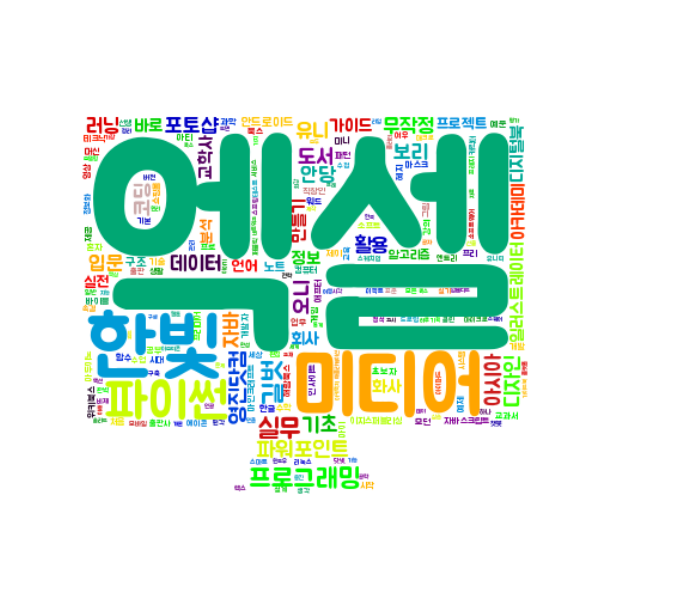

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/BMJUA_ttf.ttf"
wc = WordCloud(font_path=path , background_color="white",relative_scaling=0.2,
               max_font_size=400, mask=Mask1,colormap='nipy_spectral').generate_from_frequencies(keyword_dict_shit명)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.savefig('alice.png')
plt.show()

In [ ]:
import numpy as np
from PIL import Image

mask = Image.new("RGBA",(560,500),(255,255,255))
image = Image.open('/content/drive/My Drive/Colab Notebooks/달러.png').convert("RGBA")
x,y = image.size
mask.paste(image,(0,0,x,y),image)
Mask2 = np.array(mask)

In [ ]:
df_sample2 = df_sh_여행['도서명']

val_list2=df_sample2.values.tolist()

okt = Okt()
keyword2=okt.nouns(' '.join(val_list2))

two_letter = []
for word in keyword2:
    if len(word) > 1:
        two_letter.append(word)
    
keyword_dict_sh여행명 = dict(Counter(two_letter))
keyword_dict_sh여행명

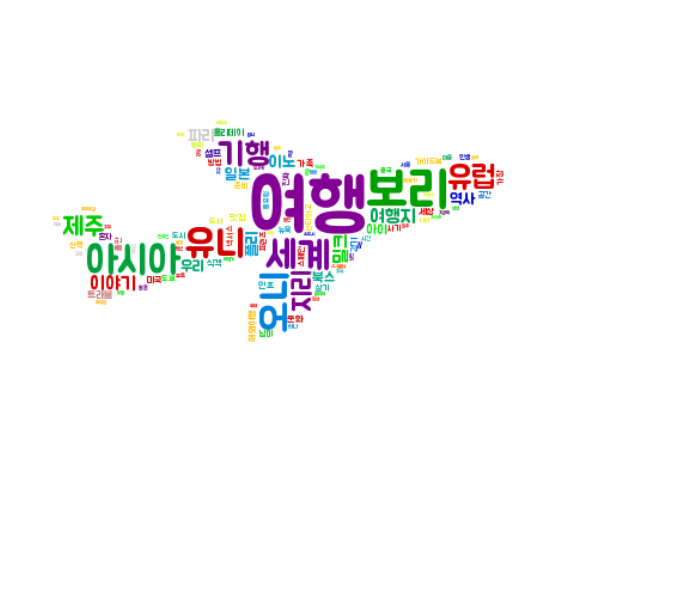

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/BMJUA_ttf.ttf"
wc = WordCloud(font_path=path , background_color="white",relative_scaling=0.2,max_font_size=400, mask=Mask3,colormap='nipy_spectral').generate_from_frequencies(keyword_dict_sh여행명)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.savefig('alice.png')
plt.show()

In [ ]:
df_sample3 = df_sh_경제['도서명']

val_list3=df_sample3.values.tolist()

okt = Okt()
keyword3=okt.nouns(' '.join(val_list3))

two_letter = []
for word in keyword3:
    if len(word) > 1:
        two_letter.append(word)
    
keyword_dict_sh경제명 = dict(Counter(two_letter))
keyword_dict_sh경제명

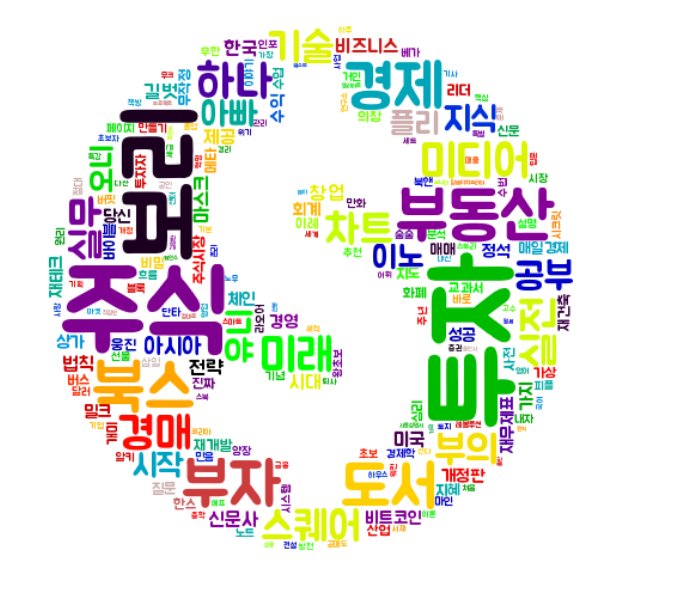

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/BMJUA_ttf.ttf"
wc = WordCloud(font_path=path , background_color="white",relative_scaling=0.2,max_font_size=400, mask=Mask2,colormap='nipy_spectral').generate_from_frequencies(keyword_dict_sh경제명)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.savefig('alice.png')
plt.show()

In [ ]:
df_sample4 = df_sh_취미['도서명']

val_list4=df_sample4.values.tolist()

okt = Okt()
keyword4=okt.nouns(' '.join(val_list4))

two_letter = []
for word in keyword4:
    if len(word) > 1:
        two_letter.append(word)
    
keyword_dict_sh취미명 = dict(Counter(two_letter))
keyword_dict_sh취미명

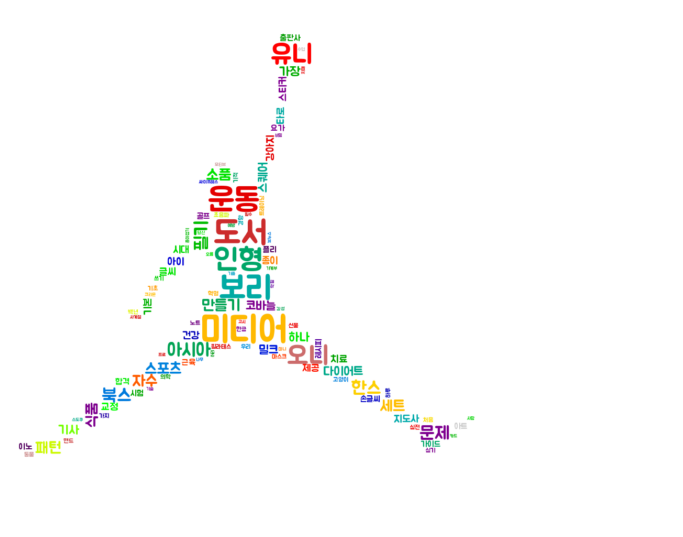

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/BMJUA_ttf.ttf"
wc = WordCloud(font_path=path , background_color="white",relative_scaling=0.2,max_font_size=400, mask=Mask4,colormap='nipy_spectral',max_words=100).generate_from_frequencies(keyword_dict_sh취미명)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.savefig('alice.png')
plt.show()

###2018~2021년 종합 베스트셀러 워드클라우드

In [ ]:
df_ex = df_best2018년_분야_종합['도서명']

val_list_ex=df_ex.values.tolist()

okt = Okt()
keyword_ex=okt.nouns(' '.join(val_list_ex))

two_letter = []
for word in keyword_ex:
    if len(word) > 1:
        two_letter.append(word)
    
keyword_best2018년_분야_종합 = dict(Counter(two_letter))
keyword_best2018년_분야_종합

In [ ]:
path = "/user/share/fonts/truetype/nanum/NanumGothic.ttf"
wc = WordCloud(font_path=path , background_color="ivory",relative_scaling=0.2,max_font_size=400, mask=Mask,colormap='prism').generate_from_frequencies(keyword_best2018년_분야_종합)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.savefig('alice.png')
plt.show()

KeyboardInterrupt: ignored

In [ ]:
df_ex1 = df_best2019년_분야_종합['도서명']

val_list_ex1=df_ex1.values.tolist()

okt = Okt()
keyword_ex1=okt.nouns(' '.join(val_list_ex1))

two_letter = []
for word in keyword_ex1:
    if len(word) > 1:
        two_letter.append(word)
    
keyword_best2019년_분야_종합 = dict(Counter(two_letter))
keyword_best2019년_분야_종합

In [ ]:
path = "/user/share/fonts/truetype/nanum/NanumGothic.ttf"
wc = WordCloud(font_path=path , background_color="ivory",relative_scaling=0.2,max_font_size=400, mask=Mask,colormap='prism').generate_from_frequencies(keyword_best2019년_분야_종합)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.savefig('alice.png')
plt.show()

In [ ]:
df_ex2 = df_best2020년_분야_종합['도서명']

val_list_ex2=df_ex2.values.tolist()

okt = Okt()
keyword_ex2=okt.nouns(' '.join(val_list_ex2))

two_letter = []
for word in keyword_ex2:
    if len(word) > 1:
        two_letter.append(word)
    
keyword_best2020년_분야_종합 = dict(Counter(two_letter))
keyword_best2020년_분야_종합

In [ ]:
path = "/user/share/fonts/truetype/nanum/NanumGothic.ttf"
wc = WordCloud(font_path=path , background_color="ivory",relative_scaling=0.2,max_font_size=400, mask=Mask,colormap='prism').generate_from_frequencies(keyword_best2020년_분야_종합)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.savefig('alice.png')
plt.show()

In [ ]:
df_ex3 = df_best2021년_분야_종합['도서명']

val_list_ex3=df_ex3.values.tolist()

okt = Okt()
keyword_ex3=okt.nouns(' '.join(val_list_ex3))

two_letter = []
for word in keyword_ex3:
    if len(word) > 1:
        two_letter.append(word)
    
keyword_best2021년_분야_종합 = dict(Counter(two_letter))
keyword_best2021년_분야_종합

In [ ]:
path = "/user/share/fonts/truetype/nanum/NanumGothic.ttf"
wc = WordCloud(font_path=path , background_color="ivory",relative_scaling=0.2,max_font_size=400, mask=Mask,colormap='prism').generate_from_frequencies(keyword_best2021년_분야_종합)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.savefig('alice.png')
plt.show()

###2018~2021 it 베스트셀러 워드클라우드

In [ ]:
df_ex = df_best2018_it['도서명']

val_list_ex=df_ex.values.tolist()

okt = Okt()
keyword_ex=okt.nouns(' '.join(val_list_ex))

two_letter = []
for word in keyword_ex:
    if len(word) > 1:
        two_letter.append(word)
    
keyword_best2018_it = dict(Counter(two_letter))
keyword_best2018_it

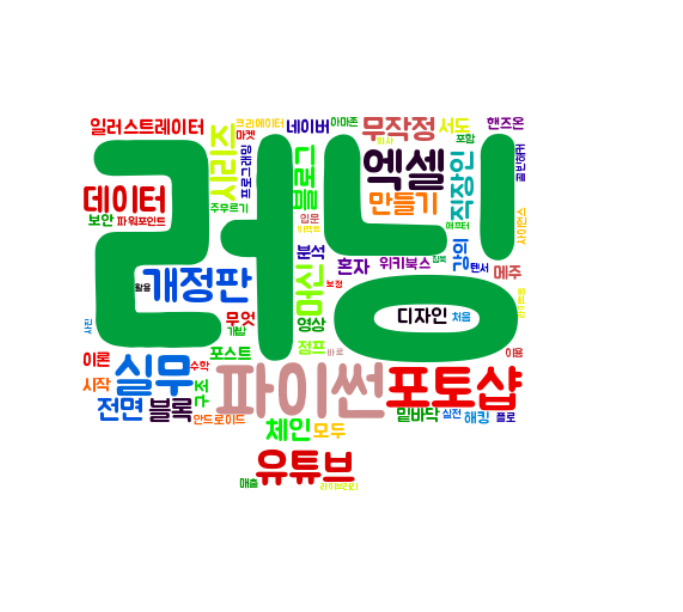

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/BMJUA_ttf.ttf"
wc = WordCloud(font_path=path , background_color="white",relative_scaling=0.2,max_font_size=400,
               mask=Mask1,colormap='nipy_spectral').generate_from_frequencies(keyword_best2018_it)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.savefig('it18.png')
plt.show()

In [ ]:
df_ex = df_best2019_it['도서명']

val_list_ex=df_ex.values.tolist()

okt = Okt()
keyword_ex=okt.nouns(' '.join(val_list_ex))

two_letter = []
for word in keyword_ex:
    if len(word) > 1:
        two_letter.append(word)
    
keyword_best2019_it = dict(Counter(two_letter))
keyword_best2019_it

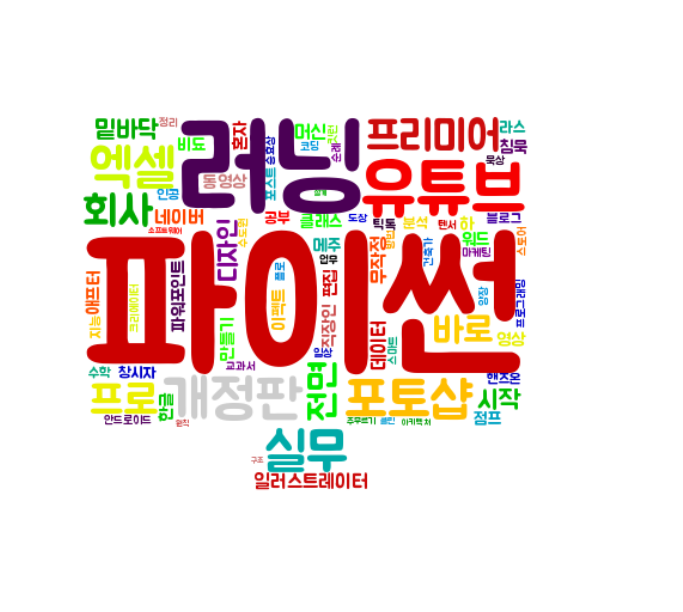

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/BMJUA_ttf.ttf"
wc = WordCloud(font_path=path , background_color="white",relative_scaling=0.2,max_font_size=400, mask=Mask1,colormap='nipy_spectral').generate_from_frequencies(keyword_best2019_it)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.savefig('alice.png')
plt.show()

In [ ]:
df_ex = df_best2020_it['도서명']

val_list_ex=df_ex.values.tolist()

okt = Okt()
keyword_ex=okt.nouns(' '.join(val_list_ex))

two_letter = []
for word in keyword_ex:
    if len(word) > 1:
        two_letter.append(word)
    
keyword_best2020_it = dict(Counter(two_letter))
keyword_best2020_it

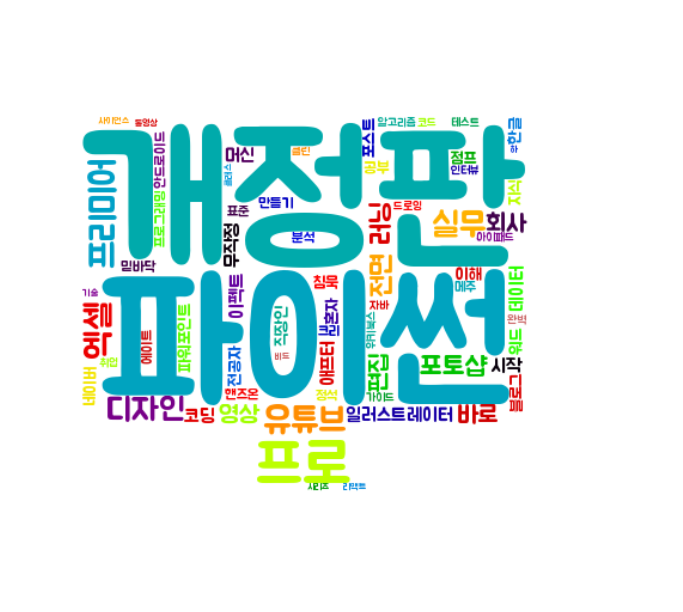

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/BMJUA_ttf.ttf"
wc = WordCloud(font_path=path , background_color="white",relative_scaling=0.2,max_font_size=400, mask=Mask1,colormap='nipy_spectral').generate_from_frequencies(keyword_best2020_it)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.savefig('alice.png')
plt.show()

In [ ]:
df_ex = df_best2021_it['도서명']

val_list_ex=df_ex.values.tolist()

okt = Okt()
keyword_ex=okt.nouns(' '.join(val_list_ex))

two_letter = []
for word in keyword_ex:
    if len(word) > 1:
        two_letter.append(word)
    
keyword_best2021_it = dict(Counter(two_letter))
keyword_best2021_it

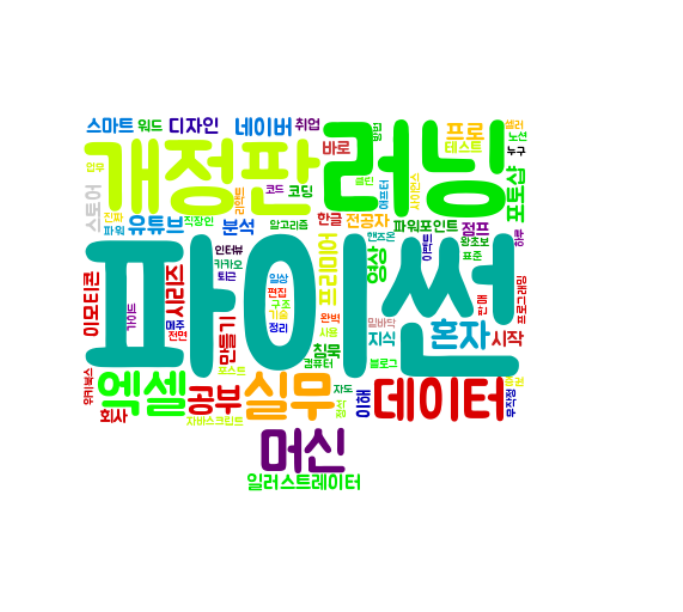

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/BMJUA_ttf.ttf"
wc = WordCloud(font_path=path , background_color="white",relative_scaling=0.2,max_font_size=400, mask=Mask1,colormap='nipy_spectral').generate_from_frequencies(keyword_best2021_it)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.savefig('alice.png')
plt.show()

###2018~2021 경제 베스트셀러 워드클라우드

In [ ]:
df_ex = df_best2018_economy['도서명']

val_list_ex=df_ex.values.tolist()

okt = Okt()
keyword_ex=okt.nouns(' '.join(val_list_ex))

two_letter = []
for word in keyword_ex:
    if len(word) > 1:
        two_letter.append(word)
    
keyword_best2018_economy = dict(Counter(two_letter))
keyword_best2018_economy

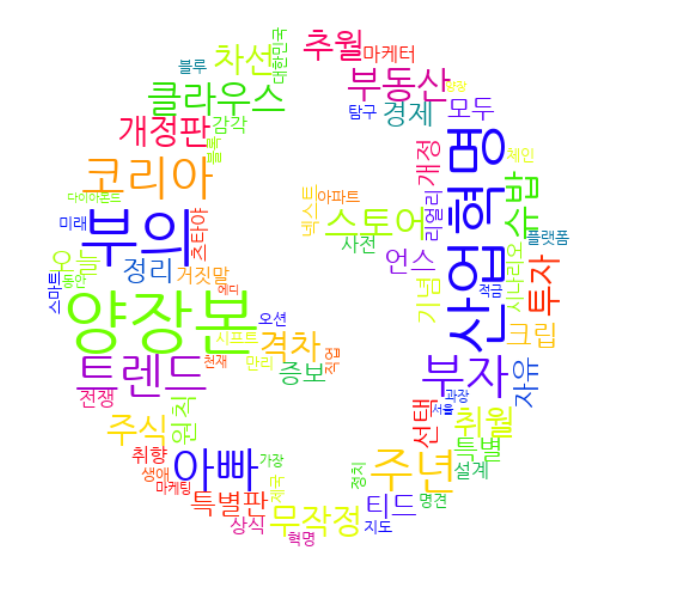

In [ ]:
path = "/user/share/fonts/truetype/nanum/NanumGothic.ttf"
wc = WordCloud(font_path=path , background_color="white",relative_scaling=0.2,max_font_size=400, mask=Mask2,colormap='nipy_spectral').generate_from_frequencies(keyword_best2018_economy)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.savefig('alice.png')
plt.show()

In [ ]:
df_ex = df_best2019_economy['도서명']

val_list_ex=df_ex.values.tolist()

okt = Okt()
keyword_ex=okt.nouns(' '.join(val_list_ex))

two_letter = []
for word in keyword_ex:
    if len(word) > 1:
        two_letter.append(word)
    
keyword_best2019_economy = dict(Counter(two_letter))
keyword_best2019_economy

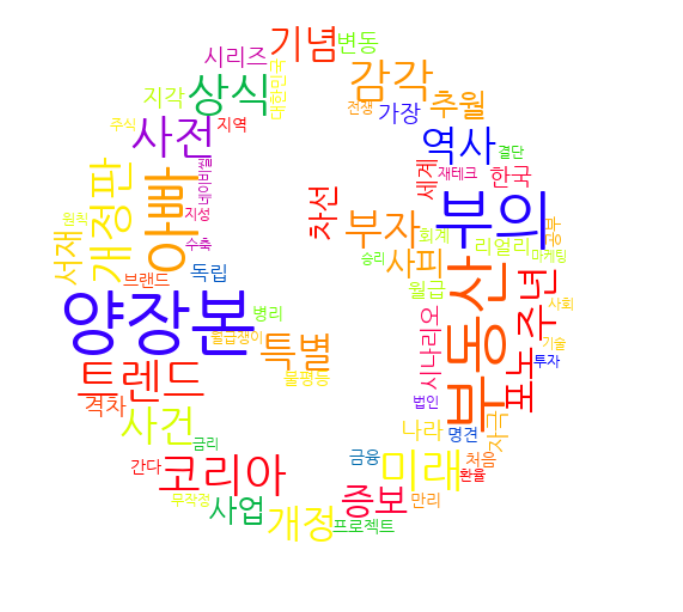

In [ ]:
path = "/user/share/fonts/truetype/nanum/NanumGothic.ttf"
wc = WordCloud(font_path=path , background_color="white",relative_scaling=0.2,max_font_size=400, mask=Mask2,colormap='nipy_spectral').generate_from_frequencies(keyword_best2019_economy)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.savefig('alice.png')
plt.show()

In [ ]:
df_ex = df_best2020_economy['도서명']

val_list_ex=df_ex.values.tolist()

okt = Okt()
keyword_ex=okt.nouns(' '.join(val_list_ex))

two_letter = []
for word in keyword_ex:
    if len(word) > 1:
        two_letter.append(word)
    
keyword_best2020_economy = dict(Counter(two_letter))
keyword_best2020_economy

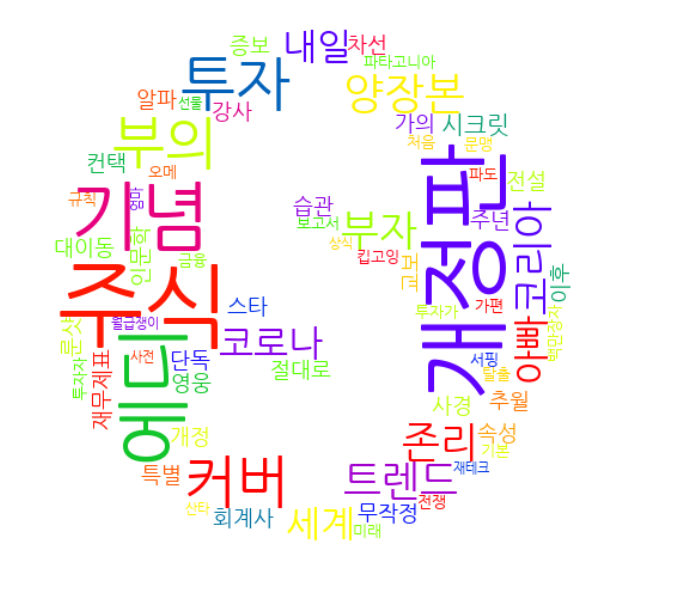

In [ ]:
path = "/user/share/fonts/truetype/nanum/NanumGothic.ttf"
wc = WordCloud(font_path=path , background_color="white",relative_scaling=0.2,max_font_size=400, mask=Mask2,colormap='nipy_spectral').generate_from_frequencies(keyword_best2020_economy)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.savefig('alice.png')
plt.show()

In [ ]:
df_ex = df_best2021_economy['도서명']

val_list_ex=df_ex.values.tolist()

okt = Okt()
keyword_ex=okt.nouns(' '.join(val_list_ex))

two_letter = []
for word in keyword_ex:
    if len(word) > 1:
        two_letter.append(word)
    
keyword_best2021_economy = dict(Counter(two_letter))
keyword_best2021_economy

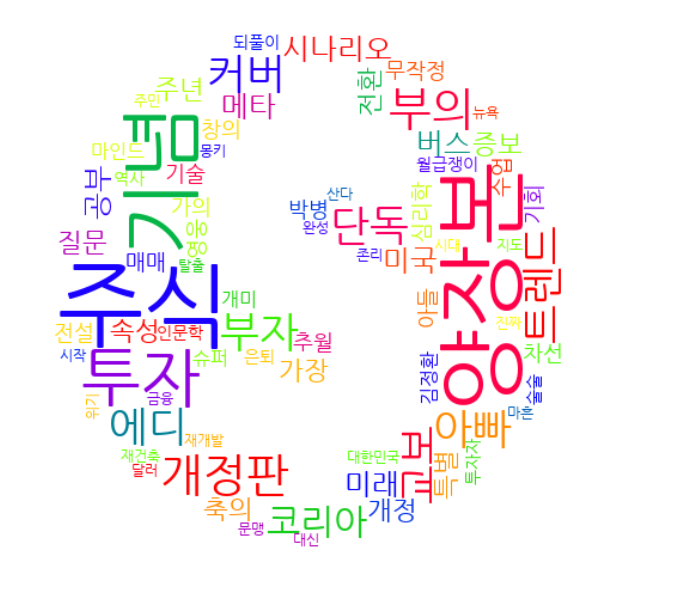

In [ ]:
path = "/user/share/fonts/truetype/nanum/NanumGothic.ttf"
wc = WordCloud(font_path=path , background_color="white",relative_scaling=0.2,max_font_size=400, mask=Mask2,colormap='nipy_spectral').generate_from_frequencies(keyword_best2021_economy)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.savefig('alice.png')
plt.show()

###2018~2021 여행 베스트셀러 워드클라우드

In [ ]:
import numpy as np
from PIL import Image

mask = Image.new("RGBA",(560,500),(255,255,255))
image = Image.open('/content/drive/My Drive/Colab Notebooks/비행기.png').convert("RGBA")
x,y = image.size
mask.paste(image,(0,0,x,y),image)
Mask3 = np.array(mask)

In [ ]:
df_ex = df_best2018_trip['도서명']

val_list_ex=df_ex.values.tolist()

okt = Okt()
keyword_ex=okt.nouns(' '.join(val_list_ex))

two_letter = []
for word in keyword_ex:
    if len(word) > 1:
        two_letter.append(word)
    
keyword_best2018_여행 = dict(Counter(two_letter))
keyword_best2018_여행

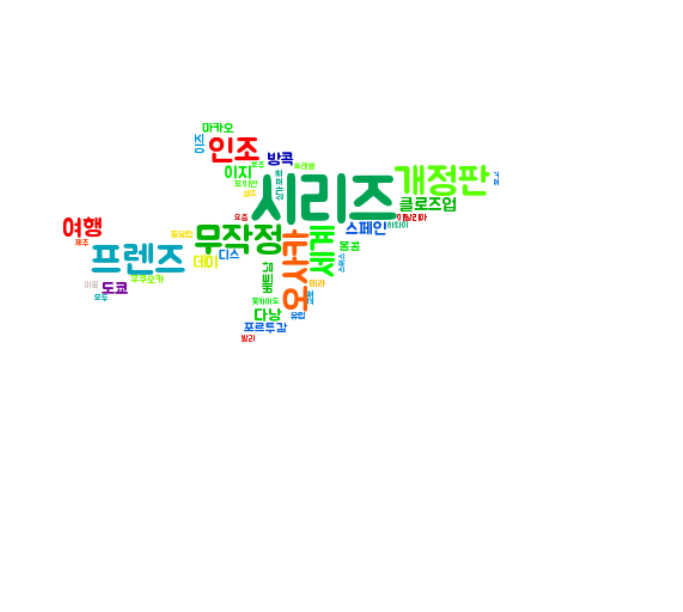

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/BMJUA_ttf.ttf"
wc = WordCloud(font_path=path , background_color="white",relative_scaling=0.2,max_font_size=400, mask=Mask3,colormap='nipy_spectral').generate_from_frequencies(keyword_best2018_여행)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.savefig('alice.png')
plt.show()

In [ ]:
df_ex = df_best2019_trip['도서명']

val_list_ex=df_ex.values.tolist()

okt = Okt()
keyword_ex=okt.nouns(' '.join(val_list_ex))

two_letter = []
for word in keyword_ex:
    if len(word) > 1:
        two_letter.append(word)
    
keyword_best2019_여행 = dict(Counter(two_letter))
keyword_best2019_여행

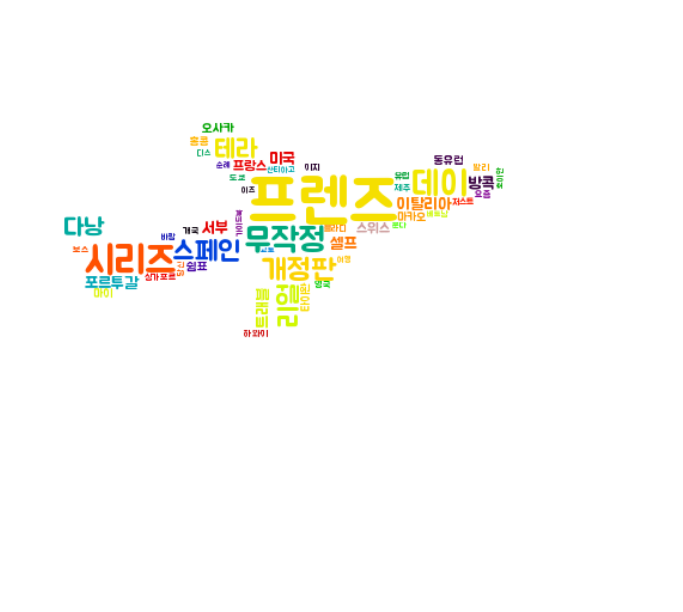

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/BMJUA_ttf.ttf"
wc = WordCloud(font_path=path , background_color="white",relative_scaling=0.2,max_font_size=400, mask=Mask3,colormap='nipy_spectral').generate_from_frequencies(keyword_best2019_여행)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.savefig('alice.png')
plt.show()

In [ ]:
df_ex = df_best2020_trip['도서명']

val_list_ex=df_ex.values.tolist()

okt = Okt()
keyword_ex=okt.nouns(' '.join(val_list_ex))

two_letter = []
for word in keyword_ex:
    if len(word) > 1:
        two_letter.append(word)
    
keyword_best2020_여행 = dict(Counter(two_letter))
keyword_best2020_여행

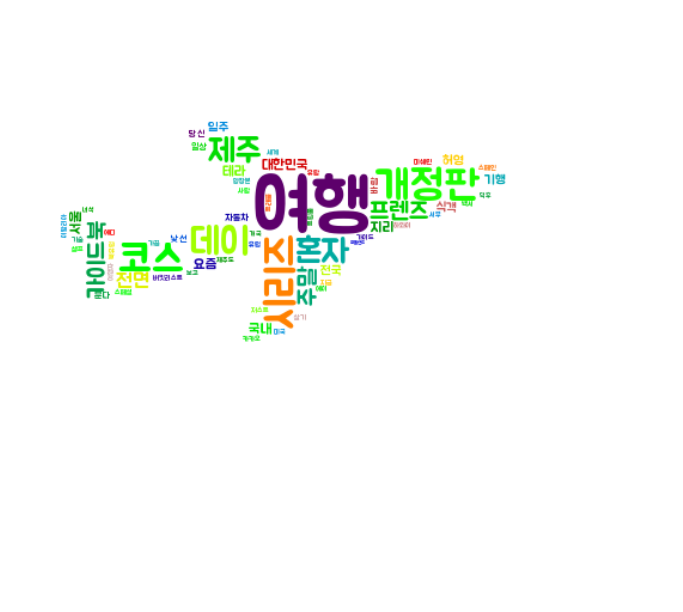

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/BMJUA_ttf.ttf"
wc = WordCloud(font_path=path , background_color="white",relative_scaling=0.2,max_font_size=400, mask=Mask3,colormap='nipy_spectral').generate_from_frequencies(keyword_best2020_여행)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.savefig('alice.png')
plt.show()

In [ ]:
df_ex = df_best2021_trip['도서명']

val_list_ex=df_ex.values.tolist()

okt = Okt()
keyword_ex=okt.nouns(' '.join(val_list_ex))

two_letter = []
for word in keyword_ex:
    if len(word) > 1:
        two_letter.append(word)
    
keyword_best2021_여행 = dict(Counter(two_letter))
keyword_best2021_여행

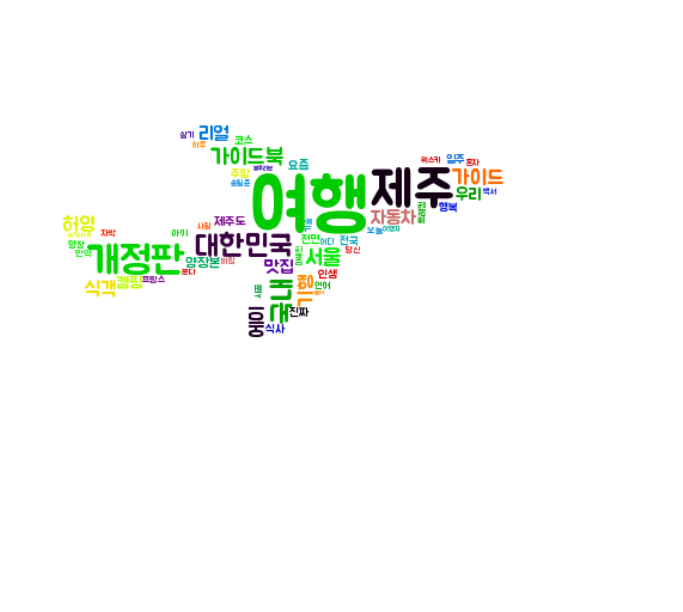

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/BMJUA_ttf.ttf"
wc = WordCloud(font_path=path , background_color="white",relative_scaling=0.2,max_font_size=400, mask=Mask3,colormap='nipy_spectral').generate_from_frequencies(keyword_best2021_여행)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.savefig('alice.png')
plt.show()

###2018~2021 취미 베스트셀러 워드클라우드

In [ ]:
import numpy as np
from PIL import Image

mask = Image.new("RGBA",(1280,1000),(255,255,255))
image = Image.open('/content/drive/My Drive/Colab Notebooks/조던.png').convert("RGBA")
x,y = image.size
mask.paste(image,(0,0,x,y),image)
Mask4 = np.array(mask)

In [ ]:
df_ex = df_best2018_hobby['도서명']

val_list_ex=df_ex.values.tolist()

okt = Okt()
keyword_ex=okt.nouns(' '.join(val_list_ex))

two_letter = []
for word in keyword_ex:
    if len(word) > 1:
        two_letter.append(word)
    
keyword_best2018_취미 = dict(Counter(two_letter))
keyword_best2018_취미

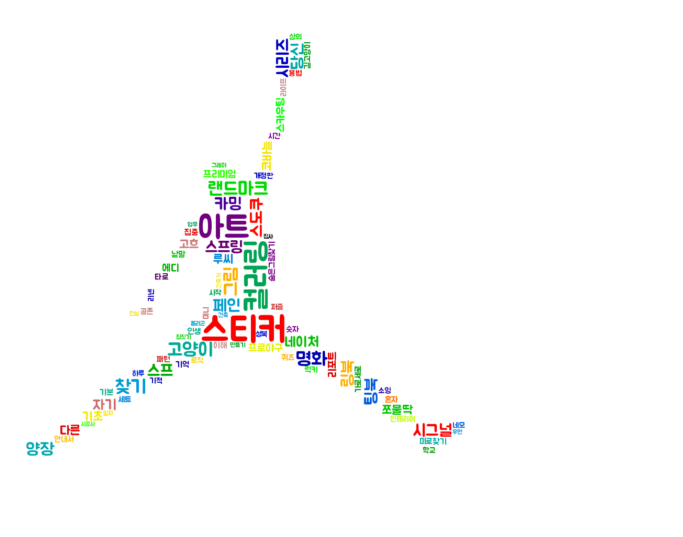

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/BMJUA_ttf.ttf"
wc = WordCloud(font_path=path , background_color="white",relative_scaling=0.2,max_font_size=400, mask=Mask4,colormap='nipy_spectral').generate_from_frequencies(keyword_best2018_취미)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.savefig('alice.png')
plt.show()

In [ ]:
df_ex = df_best2019_hobby['도서명']

val_list_ex=df_ex.values.tolist()

okt = Okt()
keyword_ex=okt.nouns(' '.join(val_list_ex))

two_letter = []
for word in keyword_ex:
    if len(word) > 1:
        two_letter.append(word)
    
keyword_best2019_취미 = dict(Counter(two_letter))
keyword_best2019_취미

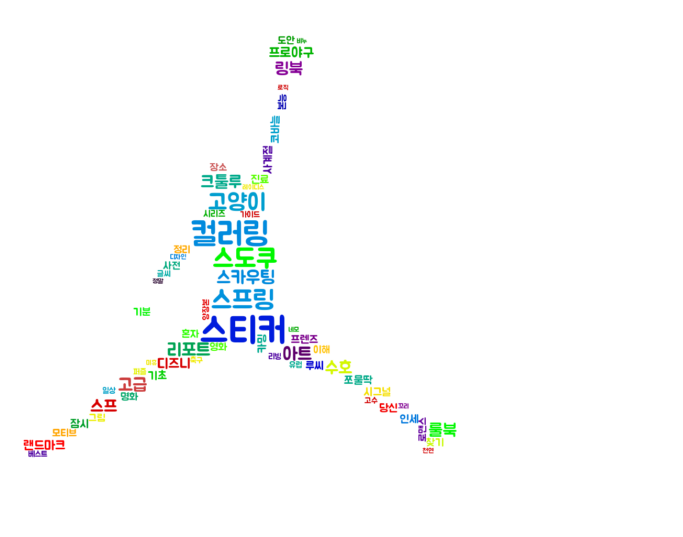

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/BMJUA_ttf.ttf"
wc = WordCloud(font_path=path , background_color="white",relative_scaling=0.2,max_font_size=400, mask=Mask4,colormap='nipy_spectral').generate_from_frequencies(keyword_best2019_취미)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.savefig('alice.png')
plt.show()

In [ ]:
df_ex = df_best2020_hobby['도서명']

val_list_ex=df_ex.values.tolist()

okt = Okt()
keyword_ex=okt.nouns(' '.join(val_list_ex))

two_letter = []
for word in keyword_ex:
    if len(word) > 1:
        two_letter.append(word)
    
keyword_best2020_취미 = dict(Counter(two_letter))
keyword_best2020_취미

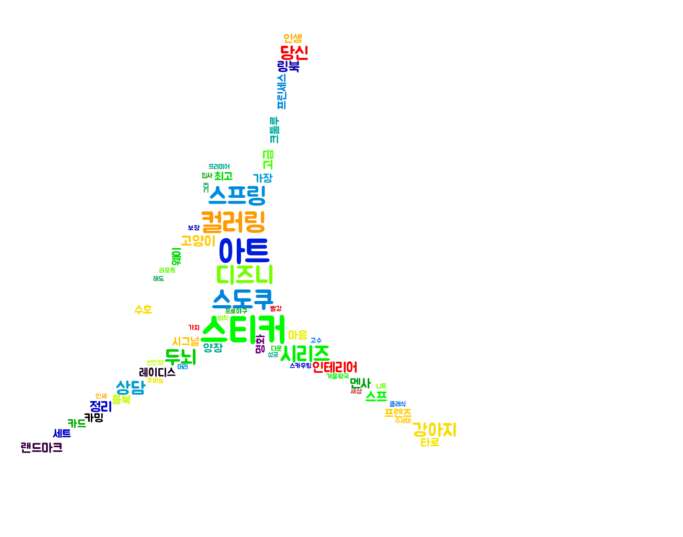

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/BMJUA_ttf.ttf"
wc = WordCloud(font_path=path , background_color="white",relative_scaling=0.2,max_font_size=400, mask=Mask4,colormap='nipy_spectral').generate_from_frequencies(keyword_best2020_취미)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.savefig('alice.png')
plt.show()

In [ ]:
df_ex = df_best2021_hobby['도서명']

val_list_ex=df_ex.values.tolist()

okt = Okt()
keyword_ex=okt.nouns(' '.join(val_list_ex))

two_letter = []
for word in keyword_ex:
    if len(word) > 1:
        two_letter.append(word)
    
keyword_best2021_취미 = dict(Counter(two_letter))
keyword_best2021_취미

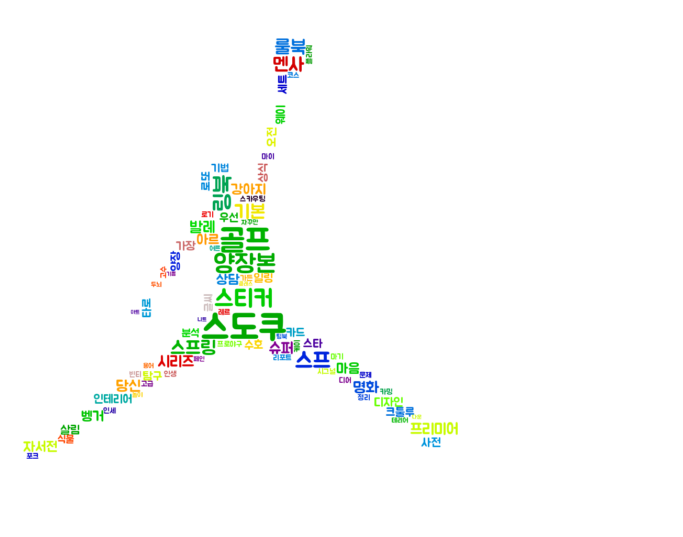

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/BMJUA_ttf.ttf"
wc = WordCloud(font_path=path , background_color="white",relative_scaling=0.2,max_font_size=400, mask=Mask4,colormap='nipy_spectral').generate_from_frequencies(keyword_best2021_취미)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.savefig('alice.png')
plt.show()

In [ ]:
# 바그래프
import seaborn as sns
plt.figure(figsize=(8,8))

plt.title("종합 베스트셀러 분야별",fontsize=20)
plt.axis('equal') 

name_b=df_best['name'].tolist()
sum_b=df_best['sum'].values.tolist()

colors = sns.color_palette('hls',len(name_b)) 
 

plt.pie(sum_b,labels=name_b, autopct="%.1f%%",
        textprops={'size': 12},startangle=30,
        colors = colors ## 색상 지정
       ) #소수 아래 한자리로 %비율 표시. %%=%도 함께 표기 #startangle=각도

plt.axis('equal') 
plt.savefig("pi_rank_genre_21.png",dpi=150) 
plt.show()

In [ ]:
### 파이차트 ###
import seaborn as sns
plt.figure(figsize=(8,8))

plt.title("종합 베스트셀러 분야별",fontsize=20)
plt.axis('equal') 

name_b=df_best['name'].tolist()
sum_b=df_best['sum'].values.tolist()

colors = sns.color_palette('hls',len(name_b)) 
 

plt.pie(sum_b,labels=name_b, autopct="%.1f%%",
        textprops={'size': 12},startangle=30,
        colors = colors ## 색상 지정
       ) #소수 아래 한자리로 %비율 표시. %%=%도 함께 표기 #startangle=각도

plt.axis('equal') 
plt.savefig("pi_rank_genre_21.png",dpi=150) 
plt.show()

In [ ]:
############ 꺽은선 ##############
### x라벨 컬럼명에서 년도 가져오기
xlabel=df_OUTER_JOIN4.columns[1:-1].tolist()

### y라벨 만들기 갯수만큼
ix_n=len(df_OUTER_JOIN4.head(6).index)
ylabel_list=[]

for d in range(ix_n):
    globals()['ylabel_{}'.format(str(d))] = df_OUTER_JOIN4.loc[d].tolist()[:-1]
    ylabel_list.append('ylabel_{}'.format(str(d)))


plt.figure(figsize=(9,7))
# plt.grid(axis='x')
plt.plot(xlabel,ylabel_0[1:],"b-",label=ylabel_0[0])
plt.plot(xlabel,ylabel_1[1:],"g-",label=ylabel_1[0])
plt.plot(xlabel,ylabel_2[1:],"r-",label=ylabel_2[0])
plt.plot(xlabel,ylabel_3[1:],"c-",label=ylabel_3[0])
plt.plot(xlabel,ylabel_4[1:],"m-",label=ylabel_4[0])
plt.plot(xlabel,ylabel_5[1:],"y-",label=ylabel_5[0])

 
plt.xlabel("년도") 
plt.ylabel("빈도")
# plt.xlim(0,0)
plt.ylim(0,50)
plt.title("4년간")
plt.legend(loc=3)